In [139]:
#Quick fix for plotting training and validation loss
#Long term fix is to use tensorboard

In [140]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

In [141]:
EXPERIMENT_DIR = '/home/jupyter/experiments/09-simclr-freeze'

In [142]:
#merge all files of the form train_results_ or val_results_
#the assumption is that all result files in a single directory belong to the same experiment

training_results_files = [filename for filename in os.listdir(EXPERIMENT_DIR) if filename.startswith('train_results_')]
validation_results_files = [filename for filename in os.listdir(EXPERIMENT_DIR) if filename.startswith('val_results_')]

In [143]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1)) 

def aggregate_all_results_across_phase(results_files):
    all_results = {}
    for filename in results_files:
        with open(os.path.join(EXPERIMENT_DIR, filename)) as json_file:
            results = json.load(json_file)
            Merge(results, all_results)

    return all_results

def extract_loss_ordered_by_epoch(results):
    loss_at_epoch = {}
    for key, value in results.items():
        loss_at_epoch[int(value['epoch'])] = value['loss']
    losses = [loss_at_epoch[epoch] for epoch in sorted(loss_at_epoch.keys())]

    print(loss_at_epoch)
    print(losses)
    return losses

In [144]:
training_results = aggregate_all_results_across_phase(training_results_files)
validation_results = aggregate_all_results_across_phase(validation_results_files)

In [145]:
train_losses = extract_loss_ordered_by_epoch(training_results)
validation_losses = extract_loss_ordered_by_epoch(validation_results)

{0: 7.0353205020611105, 1: 6.301916748359245, 2: 6.058700975650002, 3: 5.887283495578814, 4: 5.716801293138831}
[7.0353205020611105, 6.301916748359245, 6.058700975650002, 5.887283495578814, 5.716801293138831]
{0: 6.597981831737768, 1: 6.44778248974096, 2: 6.312253136501134, 3: 6.331028301025105, 4: 6.212054720548826}
[6.597981831737768, 6.44778248974096, 6.312253136501134, 6.331028301025105, 6.212054720548826]


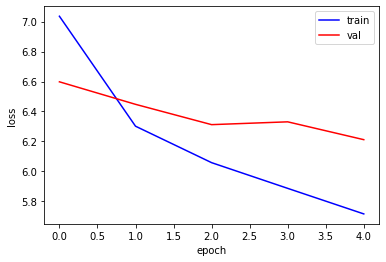

In [146]:
epochs = np.arange(0, len(train_losses))
plt.plot(epochs, train_losses, color='blue')
plt.plot(epochs, validation_losses, color='red')
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()